In [14]:
# General purpose
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Text processing
from sklearn.feature_extraction.text import CountVectorizer

# Optional for sentiment analysis later
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')  # required if using NLTK sentiment

# Warnings
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Load the CSV file into a DataFrame
clean_tweets = pd.read_csv('cleaned_safaricom_data.csv')

# Display information about the DataFrame
clean_tweets.info()

# Display the first 5 rows of the DataFrame
clean_tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content         3700 non-null   object
 1   Likes           3700 non-null   int64 
 2   Retweets        3700 non-null   int64 
 3   Replies         3700 non-null   int64 
 4   Quotes          3700 non-null   int64 
 5   Views           3700 non-null   int64 
 6   Date            3700 non-null   object
 7   Labels          3700 non-null   object
 8   chars           3700 non-null   int64 
 9   words           3700 non-null   int64 
 10  sentences       3700 non-null   int64 
 11  Tokenized Text  3700 non-null   object
 12  Lematized Text  3700 non-null   object
 13  processed_text  3700 non-null   object
dtypes: int64(8), object(6)
memory usage: 404.8+ KB


,Content,Likes,Retweets,Replies,Quotes,Views,Date,Labels,chars,words,sentences,Tokenized Text,Lematized Text,processed_text
0,how comes i have overdue debts na sijakopawhat...,1,0,0,0,21,"July 27, 2025 at 07:51 PM",Customer care complaint,99,19,1,"['how', 'comes', 'i', 'have', 'overdue', 'debt...","['how', 'come', 'i', 'have', 'overdue', 'debt'...",how come i have overdue debt na sijakopawhats ...
1,montyhasashi safaricom,0,0,0,0,22,"July 27, 2025 at 03:26 AM",Neutral,28,5,1,"['montyhasashi', 'safaricom']","['montyhasashi', 'safaricom']",montyhasashi safaricom
2,safaricom weka data wacheni jokesthank you for...,0,0,0,0,6,"July 26, 2025 at 08:23 AM",Internet or airtime bundle complaint,181,38,2,"['safaricom', 'weka', 'data', 'wacheni', 'joke...","['safaricom', 'weka', 'data', 'wacheni', 'joke...",safaricom weka data wacheni jokesthank you for...
3,safaricomplc hello safaricomplc safaricom can ...,0,0,0,0,47,"July 24, 2025 at 08:13 PM",Customer care complaint,280,53,4,"['safaricomplc', 'hello', 'safaricomplc', 'saf...","['safaricomplc', 'hello', 'safaricomplc', 'saf...",safaricomplc hello safaricomplc safaricom can ...
4,peterndegwa safaricomplc safaricomcare safbusi...,0,0,0,0,5,"July 24, 2025 at 10:51 AM",Customer care complaint,255,48,2,"['peterndegwa', 'safaricomplc', 'safaricomcare...","['peterndegwa', 'safaricomplc', 'safaricomcare...",peterndegwa safaricomplc safaricomcare safbusi...


In [17]:
# Select only the numerical columns
numerical_cols = ['Likes', 'Retweets', 'Replies', 'Quotes', 'Views', 'chars', 'words', 'sentences']
df_numerical = clean_tweets[numerical_cols]

# Get the descriptive statistics of the numerical columns
numerical_summary = df_numerical.describe()

# Print the descriptive statistics
print(numerical_summary)

             Likes     Retweets      Replies       Quotes         Views  \
count  3700.000000  3700.000000  3700.000000  3700.000000   3700.000000   
mean      2.117568     0.827027     0.397568     0.042432    164.247838   
std      42.298454    20.909099     2.917732     0.750658   1302.888404   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      3.000000   
50%       0.000000     0.000000     0.000000     0.000000     25.000000   
75%       1.000000     0.000000     0.000000     0.000000     72.000000   
max    2528.000000  1244.000000   122.000000    40.000000  64438.000000   

             chars        words    sentences  
count  3700.000000  3700.000000  3700.000000  
mean    130.674595    24.529730     1.740811  
std      86.487406    16.547144     1.121738  
min      10.000000     2.000000     1.000000  
25%      61.000000    11.000000     1.000000  
50%     106.000000    20.000000     1.0000

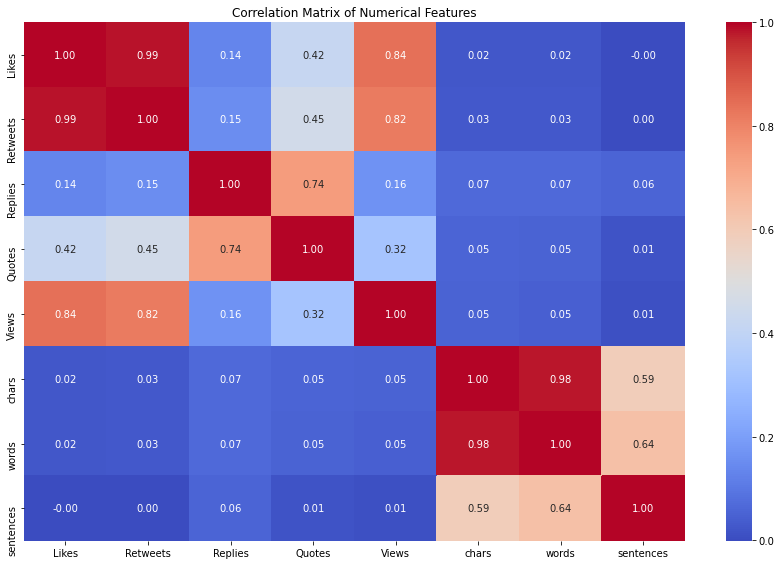

In [19]:
# Select only the numerical columns
numerical_cols = ['Likes', 'Retweets', 'Replies', 'Quotes', 'Views', 'chars', 'words', 'sentences']
df_numerical = clean_tweets[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

In [20]:
!pip install wordcloud


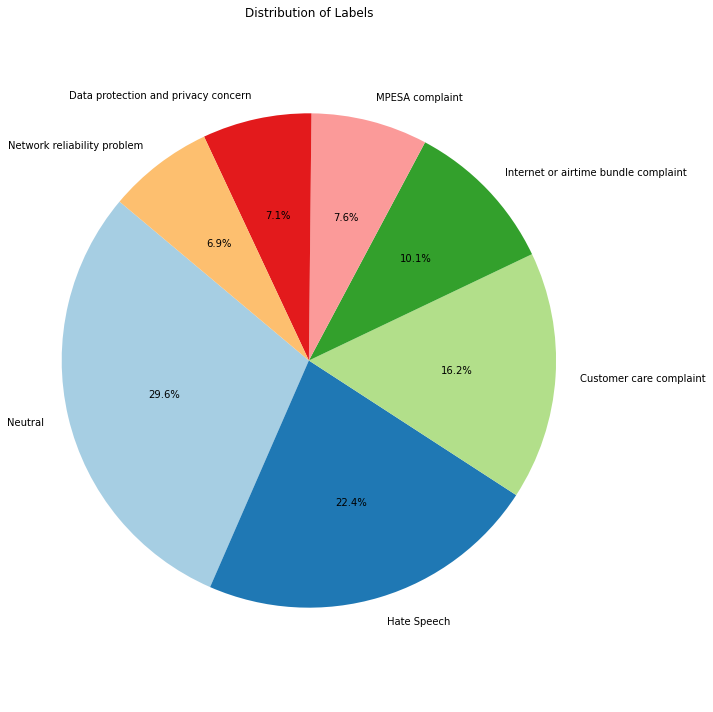

In [22]:
# Get the value counts of the 'Labels' column
label_counts = clean_tweets['Labels'].value_counts()

# Create a pie chart with white background
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')  # set figure background to white
ax.pie(label_counts, 
       labels=label_counts.index, 
       autopct='%1.1f%%', 
       startangle=140, 
       colors=plt.cm.Paired.colors)
ax.set_title('Distribution of Labels')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save and show
plt.tight_layout()
plt.savefig('label_distribution_piechart.png', facecolor='white')  # save with white background
plt.show()


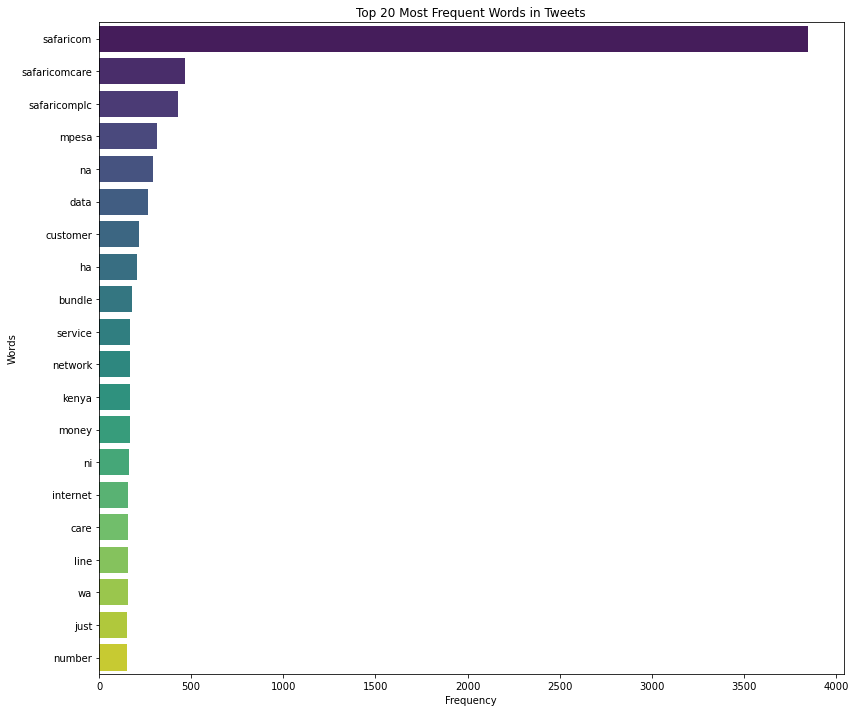

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine all processed text into one string
text = ' '.join(clean_tweets['processed_text'].dropna())

# Use CountVectorizer to get word counts
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([text])

# Create a DataFrame of word frequencies
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
word_freq = word_freq.T
word_freq.columns = ['count']
word_freq = word_freq.sort_values(by='count', ascending=False).head(20).reset_index()
word_freq.columns = ['word', 'count']

# Plot the top words
plt.figure(figsize=(12, 10))
sns.barplot(data=word_freq, y='word', x='count', palette='viridis')
plt.title('Top 20 Most Frequent Words in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.show()


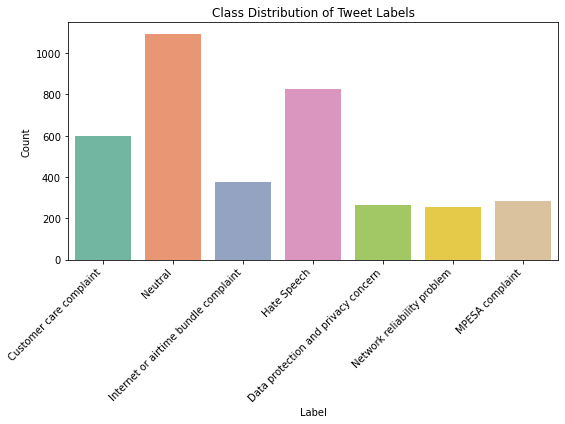

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='Labels', data=clean_tweets, palette='Set2')
plt.title('Class Distribution of Tweet Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


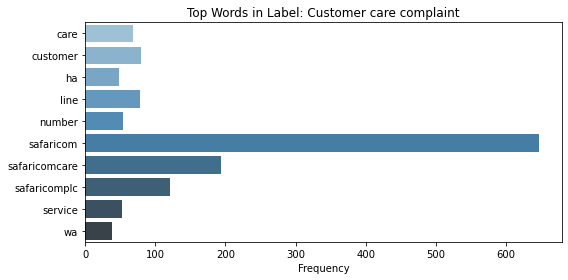

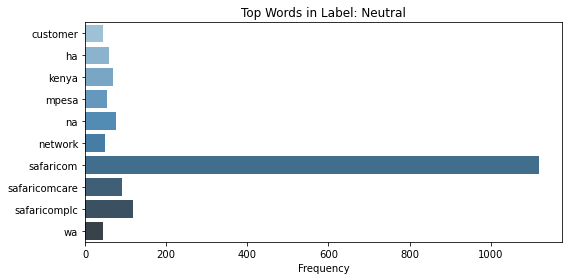

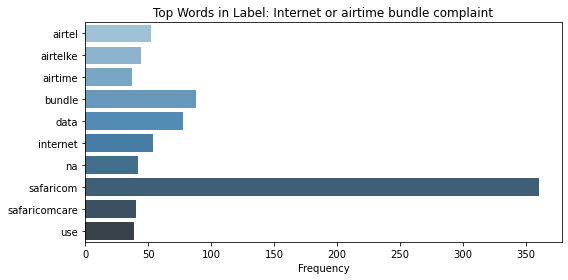

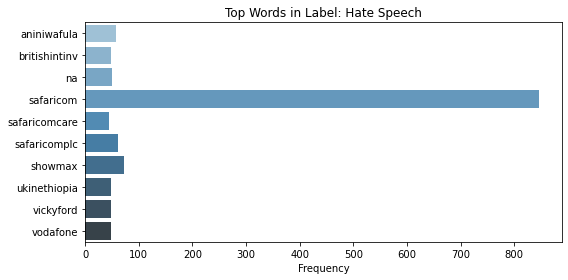

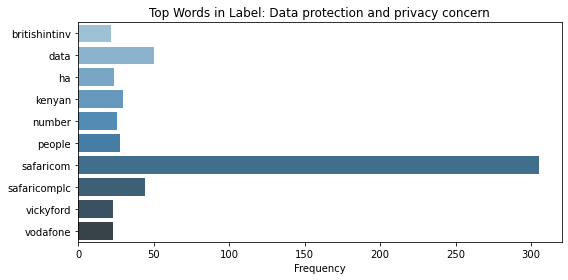

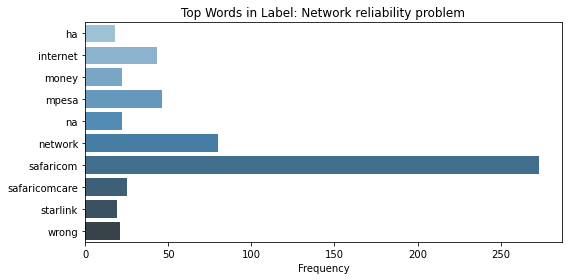

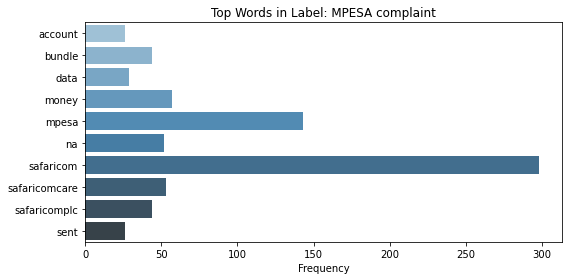

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

labels = clean_tweets['Labels'].unique()
for label in labels:
    subset = clean_tweets[clean_tweets['Labels'] == label]
    vectorizer = CountVectorizer(stop_words='english', max_features=10)
    X = vectorizer.fit_transform(subset['processed_text'])
    word_freq = X.sum(axis=0).A1
    words = vectorizer.get_feature_names()
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=word_freq, y=words, palette='Blues_d')
    plt.title(f'Top Words in Label: {label}')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()


This plot provides interesting insights into the posting times. It shows that activity peaks in the morning and early afternoon, specifically between 8 AM and 1 PM, and then drops off significantly in the evening. This pattern aligns with typical working hours and suggests that the content is related to activities or issues that people face during their workday.

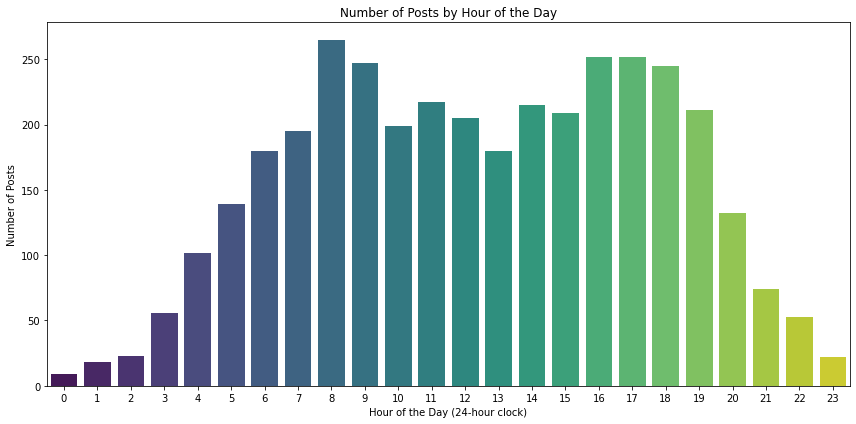

In [28]:
# Convert the 'Date' column to datetime objects
clean_tweets['Date'] = pd.to_datetime(clean_tweets['Date'])

# Extract the hour from the 'Date'
clean_tweets['Hour'] = clean_tweets['Date'].dt.hour

# Get the value counts for each hour of the day
hour_counts = clean_tweets['Hour'].value_counts().sort_index()

# Create a bar plot of the post counts by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')
plt.title('Number of Posts by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('posts_by_hour_of_day.png')

The best engagement was observed between Likes, Retweets, and Replies, as indicated by their strong positive correlations. This suggests that posts that receive a high number of likes are also very likely to be retweeted and replied to. However, Views showed a weaker relationship with these other engagement metrics, indicating that a high number of views doesn't necessarily translate to other forms of interaction.

In [ ]:
import plotly.graph_objects as go

corr_matrix = clean_tweets[['Likes', 'Retweets', 'Replies', 'Quotes', 'Views']].corr()
fig = go.Figure(go.Heatmap(
    z=corr_matrix,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    hoverongaps=False
))
fig.update_layout(title=' Metrics Correlation')
fig.show()